In [1]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [2]:
import pandas as pd
import numpy as np
import plotnine as p9
import scanpy as sc
import squidpy as sq
import tiledb
import tiledbsoma
from anndata import AnnData
import matplotlib.pyplot as plt
import anndata
import glob
import shutil

In [3]:
import random
random.seed(2023)

In [3]:
!mkdir "data/cosMx_human_liver/region_fov"

mkdir: cannot create directory ‘data/cosMx_human_liver/region_fov’: No such file or directory


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
adata = sc.read("cosMx_human_liver/data/cosMx_human_liver/LiverDataReleaseSeurat_newUMAP.h5ad")
adata

AnnData object with n_obs × n_vars = 793318 × 1000
    obs: 'RNA_pca_cluster_default', 'RNA_pca_cluster_default.1', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nCount_falsecode', 'nFeature_falsecode', 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CK8.18', 'Max.CK8.18', 'Mean.Membrane', 'Max.Membrane', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'assay_type', 'Run_name', 'slide_ID_numeric', 'Run_Tissue_name', 'Panel', 'Mean.Yellow', 'Max.Yellow', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'cell_ID', 'x_FOV_px', 'y_FOV_px', 'x_slide_mm', 'y_slide_mm', 'propNegative', 'complexity', 'errorCtEstimate', 'percOfDataFromError', 'qcFlagsRNACounts', 'qcFlagsCellCounts', 'qcFlagsCellPropNeg', 'qcFlagsCellComplex', 'qcFlagsCellArea', 'median_negprobes', 'negprobes_quantile_0.9', 'median_RNA', 'RNA_quantile_0.9', 'nCell', 'nCount', 'nCountPerCell', 'nFeaturePerCell', 'propNegativeCellAvg', 'complexityCellAvg', '

In [6]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

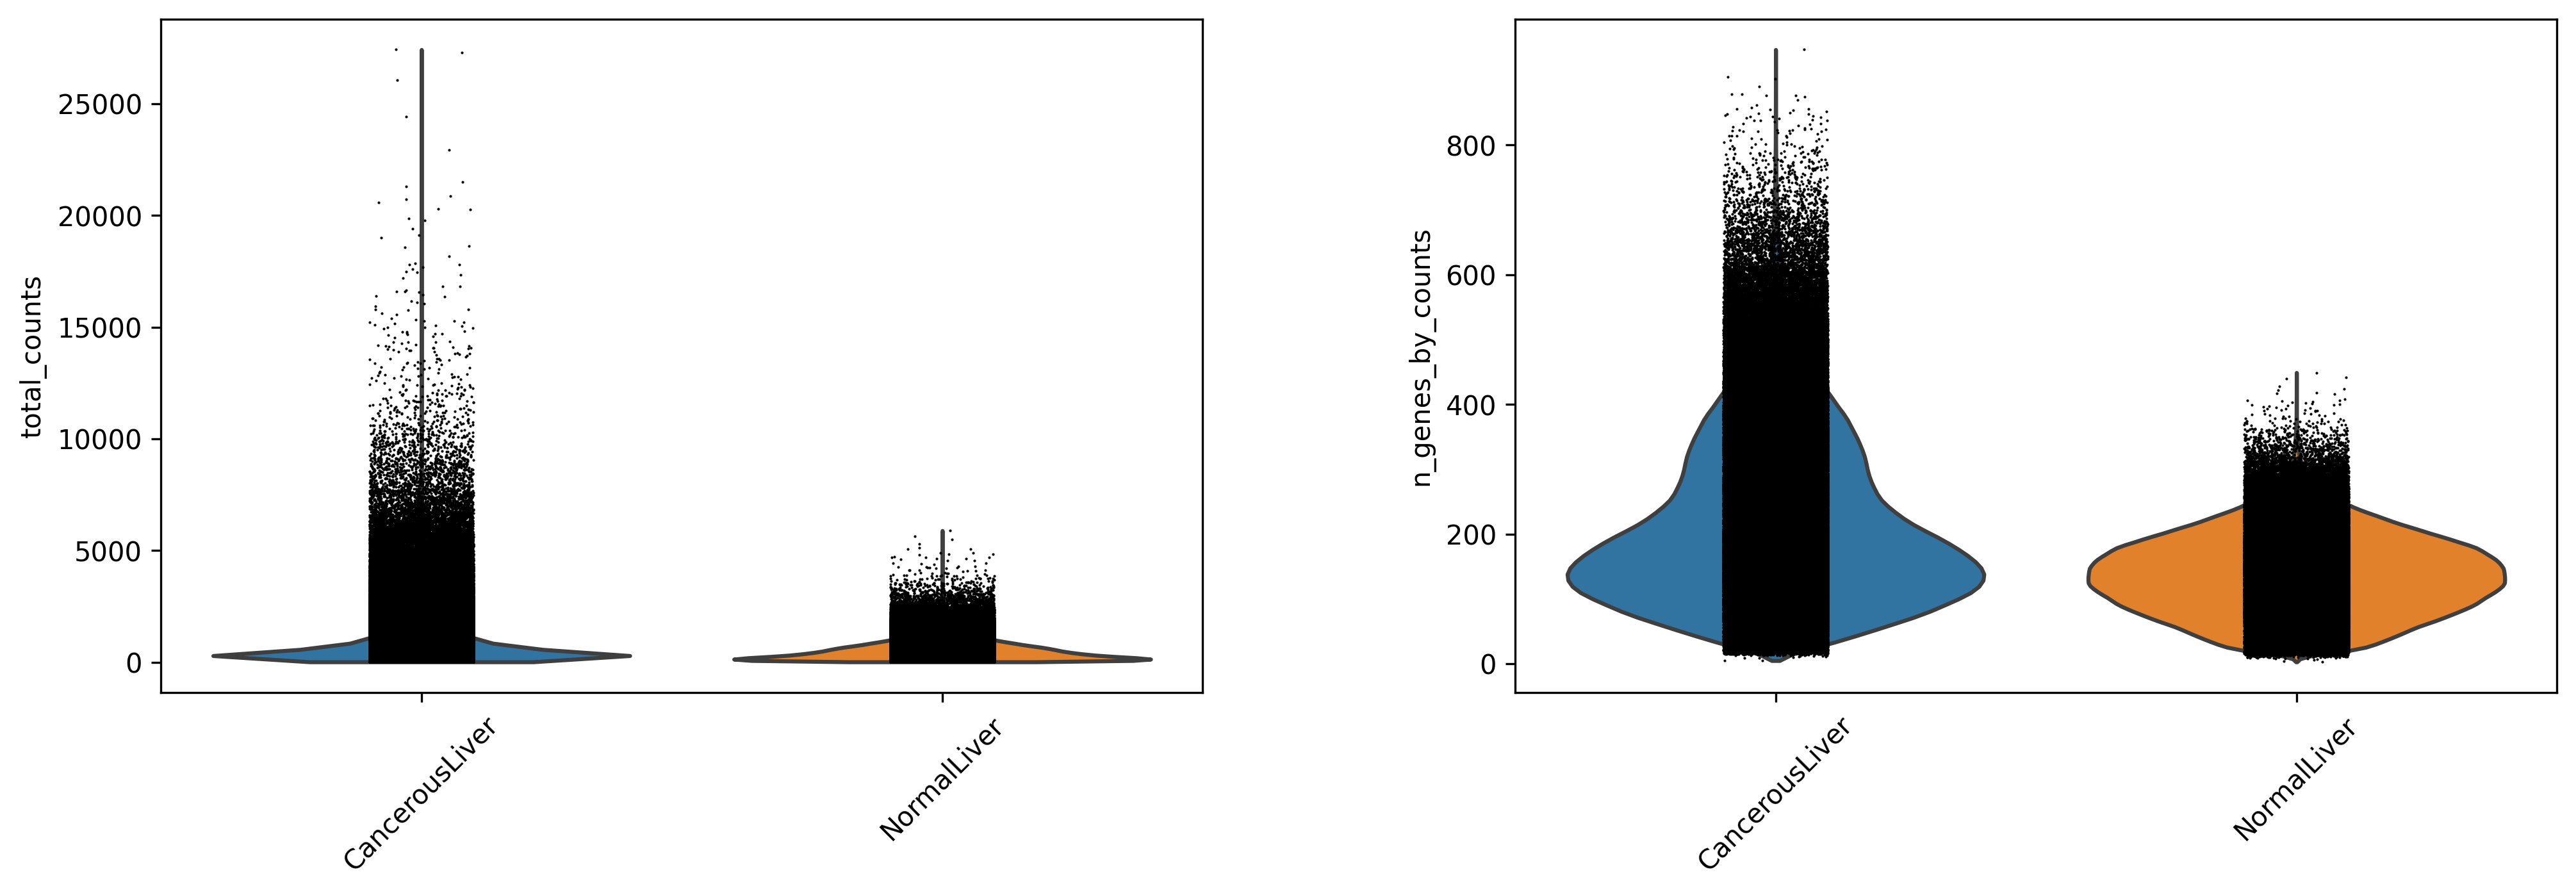

In [7]:
sc.pl.violin(adata, ['total_counts', "n_genes_by_counts"],
             jitter=0.1, 
             groupby = 'Run_Tissue_name', 
             rotation= 45,
             save=f'cosMx_human_liver_QC.png', dpi=300)

In [8]:
tab = adata.obs.groupby("fov")[["x_FOV_px", "y_FOV_px"]].agg(max)
tab.columns = [f"{c}_max" for c in tab.columns]
tab = tab.reset_index()
tab = tab.merge(adata.obs)
tab.head()

fov  x_FOV_px_max  y_FOV_px_max RNA_pca_cluster_default  \
0    1          4237          4243                       7   
1    1          4237          4243                       6   
2    1          4237          4243                       7   
3    1          4237          4243                       7   
4    1          4237          4243                      13   

  RNA_pca_cluster_default.1 orig.ident  nCount_RNA  nFeature_RNA  \
0                         4          c      1374.0           248   
1                        11          c      2527.0           267   
2                        11          c      1899.0           248   
3                        11          c      1529.0           231   
4                        15          c        39.0            21   

   nCount_negprobes  nFeature_negprobes  nCount_falsecode  nFeature_falsecode  \
0               0.0                   0               3.0                   3   
1               0.0                   0               7.0                   7   
2               5.0                   4               7.0                   7   
3               0.0                   0               6.0                   6   
4               1.0                   1               1.0                   1   

    Area  AspectRatio  Width  Height  Mean.PanCK  Max.PanCK  Mean.CK8.18  \
0  16659         0.99    159     161        1073       2124         4651   
1  14761         1.07    160     150        1250       2780         4904   
2  19481         0.95    176     185        2092       3519         6051   
3  12352         0.87    123     141        1476       2667         4167   
4   3292         1.25     75      60        2252       4362         2440   

   Max.CK8.18  Mean.Membrane  Max.Membrane  Mean.CD45  Max.CD45  Mean.DAPI  \
0       21405           1793          6361        227      3822       1693   
1       20289           1591          6543        258      1059       1513   
2       18487           2391         10509        519      1522       1774   
3       18823           1938          7603        316      1039       2239   
4        9930           2154          5958        421      1097       1173   

   Max.DAPI    cell_id assay_type Run_name  slide_ID_numeric Run_Tissue_name  \
0      7728  c_1_1_181        RNA        ?                 1     NormalLiver   
1      5636  c_1_1_240        RNA        ?                 1     NormalLiver   
2      8348  c_1_1_253        RNA        ?                 1     NormalLiver   
3      8420   c_1_1_42        RNA        ?                 1     NormalLiver   
4      2216  c_1_1_448        RNA        ?                 1     NormalLiver   

      Panel  Mean.Yellow  Max.Yellow  Mean.CD298_B2M  Max.CD298_B2M  \
0  1000plex         <NA>        <NA>            <NA>           <NA>   
1  1000plex         <NA>        <NA>            <NA>           <NA>   
2  1000plex         <NA>        <NA>            <NA>           <NA>   
3  1000plex         <NA>        <NA>            <NA>           <NA>   
4  1000plex         <NA>        <NA>            <NA>           <NA>   

     cell_ID  x_FOV_px  y_FOV_px  x_slide_mm  y_slide_mm  propNegative  \
0  c_1_1_181      3363      1872     1.42756    11.56136      0.000000   
1  c_1_1_240      3309      2624     1.42108    11.47112      0.000000   
2  c_1_1_253      4135      2808     1.52020    11.44904      0.002626   
3   c_1_1_42      4016       328     1.50592    11.74664      0.000000   
4  c_1_1_448      3907      2325     1.49284    11.50700      0.025000   

   complexity  errorCtEstimate  percOfDataFromError qcFlagsRNACounts  \
0    5.540323              0.0             0.000000             Pass   
1    9.464419              0.0             0.000000             Pass   
2    7.657258            500.0             0.263296             Pass   
3    6.619048              0.0             0.000000             Pass   
4    1.857143            100.0             2.564103             Pass   

  qcFlagsCellCounts qc

In [9]:
data = []
for w in range(0, 200, 5):
    idx_bool = ~np.logical_and(np.logical_and(tab["x_FOV_px"] >= w, tab["x_FOV_px"] <= tab.x_FOV_px_max - w),
                                 np.logical_and(tab["y_FOV_px"] >= w, tab["y_FOV_px"] <= tab.y_FOV_px_max - w))
    
    tab["toRemove"] = idx_bool
    nCells = tab.groupby("fov").toRemove.sum().mean()
    nCells_std = tab.groupby("fov").toRemove.sum().std()
    
    
    percCells = (tab.groupby("fov").toRemove.sum() / tab.groupby("fov").toRemove.count()) * 100
    percCells_mean = percCells.mean()
    percCells_std = percCells.std()
    
    data.append([w, nCells, nCells_std, percCells_mean, percCells_std])
data = pd.DataFrame(data, columns=["padding", "nCells", "nCells_std", "percCells_mean", "percCells_std"])
data.head()

padding     nCells  nCells_std  percCells_mean  percCells_std
0        0   0.000000    0.000000        0.000000       0.000000
1        5   5.924282    2.483877        0.312349       0.158753
2       10  12.830287    4.684264        0.650285       0.238732
3       15  21.992167    7.518037        1.089248       0.304008
4       20  34.420366   11.179090        1.692733       0.384739

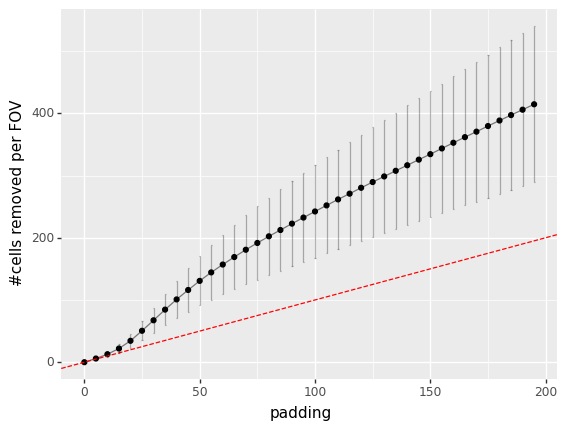

<ggplot: (1433521190985)>

In [10]:
(p9.ggplot(data, p9.aes("padding", "nCells")) 
 + p9.geom_point() 
 + p9.geom_line(alpha=0.5) 
 + p9.ylab("#cells removed per FOV") 
 + p9.geom_abline(color="red", linetype="dashed")
 + p9.geom_errorbar(p9.aes(x="padding", ymin="nCells-nCells_std",ymax="nCells+nCells_std"), alpha=0.3, size=0.5)
)

/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: figures/cosmx_pixels_padding.png


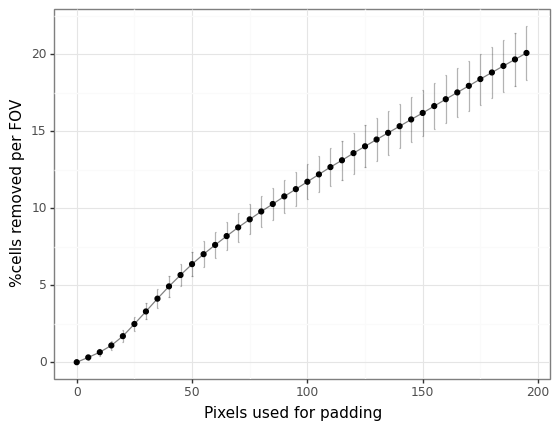

<ggplot: (1432833361628)>

In [11]:
g = (p9.ggplot(data, p9.aes("padding", "percCells_mean")) 
 + p9.geom_point() 
 + p9.geom_line(alpha=0.5) 
 + p9.ylab("%cells removed per FOV") 
 + p9.geom_errorbar(p9.aes(x="padding", ymin="percCells_mean-percCells_std",ymax="percCells_mean+percCells_std"), alpha=0.3, size=0.5)
 + p9.xlab("Pixels used for padding")
 + p9.theme_bw()
)
g.save(filename = 'figures/cosmx_pixels_padding.png', dpi=300)
g

In [10]:
pad_limit = 55

In [11]:
adata.obs.Run_Tissue_name.value_counts()

CancerousLiver    460441
NormalLiver       332877
Name: Run_Tissue_name, dtype: int64

In [12]:
adata.obs.x_FOV_px.min()

8

In [13]:
def show_image(img_path):
    import pyvips
    image = pyvips.Image.new_from_file(img_path)
    plt.imshow(image)
    plt.show()
    

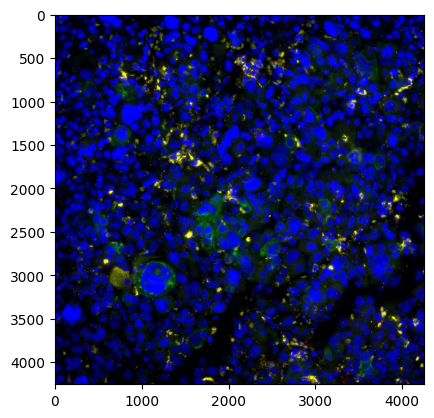

In [14]:
img_path = "cosMx_human_liver/data/cosMx_human_liver/LiverCancerFiles/CellStatsDir/CellComposite/CellComposite_F200.jpg"
show_image(img_path)

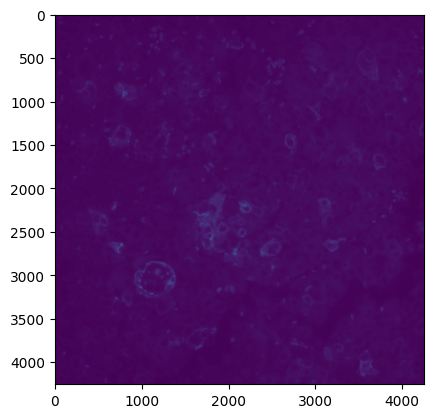

In [15]:
img_path = "cosMx_human_liver/data/cosMx_human_liver/LiverCancerFiles/CellStatsDir/Morpohology2D/20221008_005902_S3_C902_P99_N99_F200.TIF"
show_image(img_path)

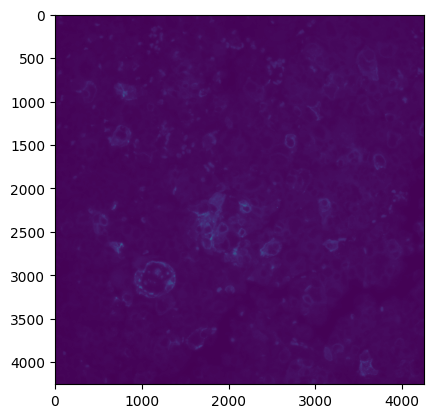

In [16]:
img_path = "cosMx_human_liver/data/cosMx_human_liver/LiverCancerFiles/CellStatsDir/Morphology2D_Normalized/20221008_005902_S3_C902_P99_N99_F200.TIF"
show_image(img_path)

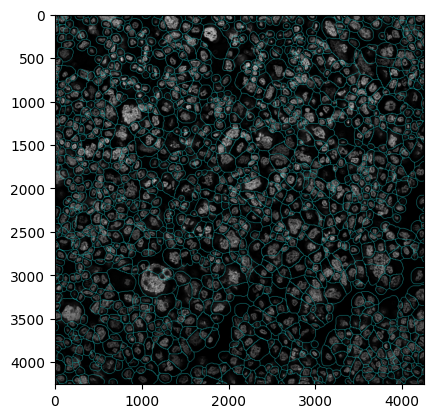

In [17]:
img_path = "cosMx_human_liver/data/cosMx_human_liver/LiverCancerFiles/CellStatsDir/CellOverlay/CellOverlay_F200.jpg"
show_image(img_path)

In [18]:
len(np.unique(glob.glob("cosMx_human_liver/data/cosMx_human_liver/LiverCancerFiles/CellStatsDir/CellComposite/CellComposite_*.jpg")))

383

In [19]:
len(adata.obs.fov.unique())

383

In [20]:
len(np.unique(glob.glob("cosMx_human_liver/data/cosMx_human_liver/NormalLiverFiles/CellStatsDir/CellComposite/CellComposite_*.jpg")))

304

In [21]:
adata.obs.cellType.value_counts() / len(adata)

tumor_1                         0.438649
Hep.4                           0.158823
Hep.5                           0.112608
tumor_2                         0.044604
CD3+.alpha.beta.T.cells         0.042539
Stellate.cells                  0.030606
Hep.3                           0.026816
Inflammatory.macrophages        0.026066
Non.inflammatory.macrophages    0.023486
Periportal.LSECs                0.022659
Hep.1                           0.021888
Mature.B.cells                  0.009961
Central.venous.LSECs            0.008262
Cholangiocytes                  0.007808
Hep.6                           0.007794
gamma.delta.T.cells.1           0.004702
NK.like.cells                   0.004358
Antibody.secreting.B.cells      0.003339
Portal.endothelial.cells        0.002013
Hep                             0.001518
Erthyroid.cells                 0.001491
NotDet                          0.000011
Name: cellType, dtype: float64

In [22]:
adata.obs.cellType.value_counts() / len(adata)

tumor_1                         0.438649
Hep.4                           0.158823
Hep.5                           0.112608
tumor_2                         0.044604
CD3+.alpha.beta.T.cells         0.042539
Stellate.cells                  0.030606
Hep.3                           0.026816
Inflammatory.macrophages        0.026066
Non.inflammatory.macrophages    0.023486
Periportal.LSECs                0.022659
Hep.1                           0.021888
Mature.B.cells                  0.009961
Central.venous.LSECs            0.008262
Cholangiocytes                  0.007808
Hep.6                           0.007794
gamma.delta.T.cells.1           0.004702
NK.like.cells                   0.004358
Antibody.secreting.B.cells      0.003339
Portal.endothelial.cells        0.002013
Hep                             0.001518
Erthyroid.cells                 0.001491
NotDet                          0.000011
Name: cellType, dtype: float64

In [23]:
adata = adata[adata.obs.cellType != "NotDet",:]

In [24]:
adata.obs.cellType = adata.obs.cellType.apply(lambda x: x.split(".")[0] if "Hep." in x else x)
adata.obs.cellType.value_counts()

/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/pandas/core/generic.py:5931: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


tumor_1                         347988
Hep                             261356
tumor_2                          35385
CD3+.alpha.beta.T.cells          33747
Stellate.cells                   24280
Inflammatory.macrophages         20679
Non.inflammatory.macrophages     18632
Periportal.LSECs                 17976
Mature.B.cells                    7902
Central.venous.LSECs              6554
Cholangiocytes                    6194
gamma.delta.T.cells.1             3730
NK.like.cells                     3457
Antibody.secreting.B.cells        2649
Portal.endothelial.cells          1597
Erthyroid.cells                   1183
Name: cellType, dtype: int64

In [25]:
adata.obs.niche.value_counts()

tumor            321889
Zone_2b          126939
Zone_2a          112282
interface         74800
tumor subtype     34517
Zone_3a           33409
non-malignant     29230
Zone_1b           26559
Zone_3b/CV        20177
Zone_1a/PV        13507
Name: niche, dtype: int64

In [26]:
tab = adata.obs[["Run_Tissue_name", "fov", "niche"]].value_counts().reset_index().groupby(["Run_Tissue_name", "fov"]).count().reset_index()
tab

Run_Tissue_name  fov  niche  0
0    CancerousLiver    1      4  4
1    CancerousLiver    2      3  3
2    CancerousLiver    3      3  3
3    CancerousLiver    4      3  3
4    CancerousLiver    5      4  4
..              ...  ...    ... ..
761     NormalLiver  379      0  0
762     NormalLiver  380      0  0
763     NormalLiver  381      0  0
764     NormalLiver  382      0  0
765     NormalLiver  383      0  0

[766 rows x 4 columns]

In [27]:
tab.niche.plot.hist()

<Axes: ylabel='Frequency'>

In [28]:
normalLiver = adata[adata.obs.Run_Tissue_name == "NormalLiver",:]
normalLiver

View of AnnData object with n_obs × n_vars = 332873 × 1000
    obs: 'RNA_pca_cluster_default', 'RNA_pca_cluster_default.1', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nCount_falsecode', 'nFeature_falsecode', 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CK8.18', 'Max.CK8.18', 'Mean.Membrane', 'Max.Membrane', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'assay_type', 'Run_name', 'slide_ID_numeric', 'Run_Tissue_name', 'Panel', 'Mean.Yellow', 'Max.Yellow', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'cell_ID', 'x_FOV_px', 'y_FOV_px', 'x_slide_mm', 'y_slide_mm', 'propNegative', 'complexity', 'errorCtEstimate', 'percOfDataFromError', 'qcFlagsRNACounts', 'qcFlagsCellCounts', 'qcFlagsCellPropNeg', 'qcFlagsCellComplex', 'qcFlagsCellArea', 'median_negprobes', 'negprobes_quantile_0.9', 'median_RNA', 'RNA_quantile_0.9', 'nCell', 'nCount', 'nCountPerCell', 'nFeaturePerCell', 'propNegativeCellAvg', 'complexityCel

In [29]:
normalLiver.obs.cellType.value_counts() / len(normalLiver)

Hep                             0.781535
Stellate.cells                  0.049514
CD3+.alpha.beta.T.cells         0.041049
Non.inflammatory.macrophages    0.028708
Periportal.LSECs                0.018274
Inflammatory.macrophages        0.017670
Cholangiocytes                  0.014369
Central.venous.LSECs            0.013266
gamma.delta.T.cells.1           0.009556
Mature.B.cells                  0.008796
NK.like.cells                   0.008267
Antibody.secreting.B.cells      0.004245
Erthyroid.cells                 0.003136
Portal.endothelial.cells        0.001613
Name: cellType, dtype: float64

In [30]:
normalLiver.obs["x_array"] = normalLiver.obs.x_slide_mm.rank(method="dense").astype(int)
normalLiver.obs["y_array"] = normalLiver.obs.y_slide_mm.rank(method="dense").astype(int)

/scratch/slurm-job.1813355/ipykernel_478267/2483126972.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


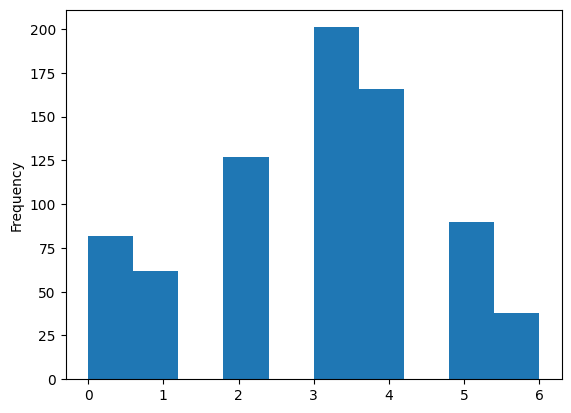

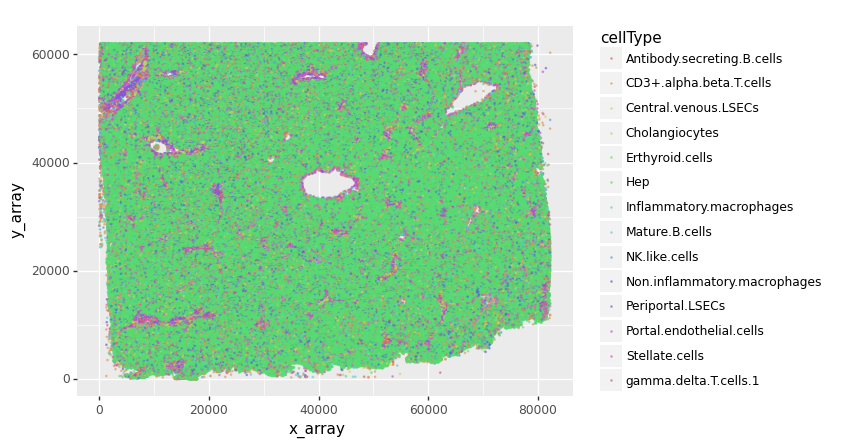

<ggplot: (1424943304476)>

In [31]:
(p9.ggplot(normalLiver.obs, p9.aes("x_array", "y_array", color="cellType")) + p9.geom_point(size=0.1, alpha=0.5))

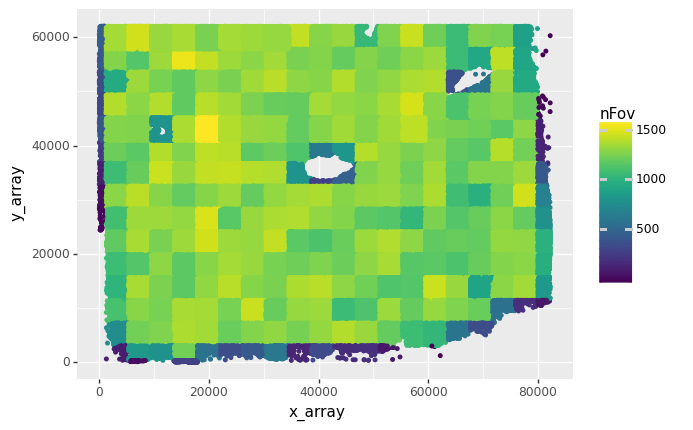

<ggplot: (1424904431613)>

In [32]:
nFov = dict(normalLiver.obs.fov.value_counts())
normalLiver.obs["nFov"] = normalLiver.obs.fov.apply(lambda x: nFov[x])
(p9.ggplot(normalLiver.obs, p9.aes("x_array", "y_array", color="nFov")) + p9.geom_point(size=1, alpha=1))

In [33]:
split_adata = []
for fov in normalLiver.obs.fov.unique():
    if nFov[fov] > 1000:
        mini_adata = normalLiver[(normalLiver.obs.fov == fov).astype(bool),: ].copy()
        mini_adata.obs["x_array"] = mini_adata.obs.x_slide_mm.rank(method="dense").astype(int)
        mini_adata.obs["y_array"] = mini_adata.obs.y_slide_mm.rank(method="dense").astype(int)

        mini_adata.obs["x_pixel"] = mini_adata.obs["x_FOV_px"].astype(np.float32)
        mini_adata.obs["y_pixel"]= mini_adata.obs["y_FOV_px"].astype(np.float32)

        maxX = mini_adata.obs["x_pixel"].max() - pad_limit
        maxY = mini_adata.obs["y_pixel"].max() - pad_limit
        
        idx_bool = np.logical_and(np.logical_and(mini_adata.obs["x_pixel"] >= pad_limit, mini_adata.obs["x_pixel"] <= maxX),
                                 np.logical_and(mini_adata.obs["y_pixel"] >= pad_limit, mini_adata.obs["y_pixel"] <= maxY))
        mini_adata = mini_adata[idx_bool,:]

        clusters = mini_adata.obs.cellType.value_counts()[mini_adata.obs.cellType.value_counts() / len(mini_adata) >= 0.01].index.values
        mini_adata = mini_adata[mini_adata.obs.cellType.isin(clusters),:] # remove rare clusters 1% (noise)
        nCluster = mini_adata.obs.cellType.unique().size

        fov_str = str(fov)
        if len(fov_str) == 1:
            fov_str = f"00{fov_str}"
        elif len(fov_str) == 2:
            fov_str = f"0{fov_str}"
        if len(mini_adata) > 0 and nCluster >= 3:
            split_adata.append(mini_adata)
            mini_adata.write_h5ad(f"cosMx_human_liver_normal/data/{fov}.h5ad")

            img_path = f"cosMx_human_liver/data/cosMx_human_liver/NormalLiverFiles/CellStatsDir/CellComposite/CellComposite_F{fov_str}.jpg"
            img_out_path = f"cosMx_human_liver_normal/data/{fov}.jpg"
            shutil.copy(img_path, img_out_path)
            print(f"FOV: {fov_str}; N_cells:{len(mini_adata)}; Removed cells: {(~idx_bool).sum()}")
        else:
            print(f"Empty for: {fov_str} with nCluster: {nCluster}")
    else:
        print(f"LQ: {fov}")

/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 100; N_cells:1122; Removed cells: 89


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 101; N_cells:1104; Removed cells: 91


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 102; N_cells:1076; Removed cells: 77


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 103; N_cells:1041; Removed cells: 75


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 104; N_cells:1147; Removed cells: 82
LQ: 105
LQ: 106


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 107; N_cells:1078; Removed cells: 75


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 108; N_cells:1037; Removed cells: 74


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 109; N_cells:1231; Removed cells: 84


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 010; N_cells:1268; Removed cells: 94


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 110; N_cells:1142; Removed cells: 83


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 111; N_cells:1231; Removed cells: 93


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 112; N_cells:1259; Removed cells: 83


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 113; N_cells:1037; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 114; N_cells:1068; Removed cells: 95


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 115; N_cells:1022; Removed cells: 51
LQ: 116
LQ: 117


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 118; N_cells:1243; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 119; N_cells:1189; Removed cells: 83


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 011; N_cells:1133; Removed cells: 94


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 120; N_cells:1093; Removed cells: 87


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 121; N_cells:1170; Removed cells: 82


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 122; N_cells:1074; Removed cells: 68


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 123; N_cells:1023; Removed cells: 71


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 124; N_cells:1234; Removed cells: 90


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 125; N_cells:1103; Removed cells: 69
LQ: 126
LQ: 127


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 128; N_cells:979; Removed cells: 64


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 129; N_cells:1057; Removed cells: 89


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 012; N_cells:1181; Removed cells: 95


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 130; N_cells:1272; Removed cells: 100


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 131; N_cells:1170; Removed cells: 97


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 132; N_cells:1253; Removed cells: 94


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 133; N_cells:1281; Removed cells: 87


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 134; N_cells:1245; Removed cells: 84


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 135; N_cells:1204; Removed cells: 92
LQ: 136
LQ: 137
LQ: 138


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 139; N_cells:1101; Removed cells: 102


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 013; N_cells:907; Removed cells: 88


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 140; N_cells:1172; Removed cells: 97


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 141; N_cells:1077; Removed cells: 83


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 142; N_cells:1171; Removed cells: 94


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 143; N_cells:1013; Removed cells: 93


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 144; N_cells:1127; Removed cells: 87


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 145; N_cells:1106; Removed cells: 85


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 146; N_cells:1183; Removed cells: 94
LQ: 147


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 149; N_cells:1138; Removed cells: 77


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 014; N_cells:1115; Removed cells: 90


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 150; N_cells:1252; Removed cells: 95


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 151; N_cells:1149; Removed cells: 80


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 152; N_cells:1063; Removed cells: 87


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 153; N_cells:1133; Removed cells: 89


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 154; N_cells:1197; Removed cells: 92


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 155; N_cells:1084; Removed cells: 74


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 156; N_cells:1181; Removed cells: 91


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 157; N_cells:1198; Removed cells: 90


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 158; N_cells:1207; Removed cells: 95


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 159; N_cells:1132; Removed cells: 79


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 015; N_cells:1278; Removed cells: 86


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 160; N_cells:1179; Removed cells: 90


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 161; N_cells:1156; Removed cells: 89


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 162; N_cells:1120; Removed cells: 74


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 163; N_cells:1199; Removed cells: 88


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 164; N_cells:974; Removed cells: 66
LQ: 165


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 166; N_cells:1080; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 167; N_cells:1286; Removed cells: 105
LQ: 169


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 016; N_cells:1079; Removed cells: 95


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 170; N_cells:988; Removed cells: 68


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 171; N_cells:1178; Removed cells: 91


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 172; N_cells:1172; Removed cells: 89


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 173; N_cells:1167; Removed cells: 80


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 174; N_cells:1332; Removed cells: 88


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 176; N_cells:1179; Removed cells: 84


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 177; N_cells:1220; Removed cells: 80


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 178; N_cells:1227; Removed cells: 86


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 179; N_cells:1168; Removed cells: 90


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 017; N_cells:933; Removed cells: 85


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 182; N_cells:1018; Removed cells: 76


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 184; N_cells:1110; Removed cells: 88


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 185; N_cells:1029; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 186; N_cells:1074; Removed cells: 84


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 187; N_cells:1117; Removed cells: 92


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 188; N_cells:1067; Removed cells: 87
LQ: 189


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 018; N_cells:1116; Removed cells: 82


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 190; N_cells:1053; Removed cells: 71


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 191; N_cells:1204; Removed cells: 84


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 192; N_cells:1098; Removed cells: 93


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 193; N_cells:1195; Removed cells: 86


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 194; N_cells:1287; Removed cells: 98


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 195; N_cells:1170; Removed cells: 92


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 197; N_cells:1273; Removed cells: 82


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 198; N_cells:1022; Removed cells: 82


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 199; N_cells:992; Removed cells: 83


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 019; N_cells:1109; Removed cells: 83
LQ: 1


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 200; N_cells:1082; Removed cells: 73


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 201; N_cells:1171; Removed cells: 92


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 202; N_cells:1236; Removed cells: 87


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 203; N_cells:1149; Removed cells: 95


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 204; N_cells:1060; Removed cells: 69


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 205; N_cells:1056; Removed cells: 74


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 207; N_cells:1153; Removed cells: 93


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 208; N_cells:1156; Removed cells: 94
LQ: 209
LQ: 20


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 210; N_cells:983; Removed cells: 53


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 211; N_cells:1040; Removed cells: 64


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 212; N_cells:1163; Removed cells: 76


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 214; N_cells:1139; Removed cells: 87


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 215; N_cells:1175; Removed cells: 100


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 216; N_cells:1170; Removed cells: 85


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 217; N_cells:1127; Removed cells: 79


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 219; N_cells:1121; Removed cells: 80


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 220; N_cells:1055; Removed cells: 98


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 221; N_cells:1148; Removed cells: 92


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 223; N_cells:1026; Removed cells: 83


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 224; N_cells:1032; Removed cells: 76


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 225; N_cells:983; Removed cells: 80


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 226; N_cells:1073; Removed cells: 66


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 227; N_cells:1119; Removed cells: 87


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 228; N_cells:1130; Removed cells: 91
LQ: 229
LQ: 22
LQ: 230


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 231; N_cells:1202; Removed cells: 86


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 234; N_cells:1170; Removed cells: 88


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 235; N_cells:1241; Removed cells: 92


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 236; N_cells:1136; Removed cells: 96


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 237; N_cells:1124; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 238; N_cells:1233; Removed cells: 79


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 239; N_cells:1253; Removed cells: 95


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 023; N_cells:1151; Removed cells: 73


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 240; N_cells:1166; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 241; N_cells:1086; Removed cells: 76


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 242; N_cells:1021; Removed cells: 72


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 243; N_cells:1003; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 244; N_cells:1297; Removed cells: 89


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 245; N_cells:1176; Removed cells: 96
LQ: 246


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 247; N_cells:1152; Removed cells: 95


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 248; N_cells:1208; Removed cells: 83
LQ: 249


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 024; N_cells:1021; Removed cells: 88


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 250; N_cells:988; Removed cells: 63


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 251; N_cells:1155; Removed cells: 90


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 253; N_cells:1190; Removed cells: 91


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 254; N_cells:1210; Removed cells: 85


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 255; N_cells:1097; Removed cells: 86


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 256; N_cells:1269; Removed cells: 95


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 257; N_cells:1085; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 258; N_cells:1170; Removed cells: 87


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 259; N_cells:1160; Removed cells: 93


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 025; N_cells:1176; Removed cells: 85


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 260; N_cells:948; Removed cells: 80


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 261; N_cells:1002; Removed cells: 78


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 262; N_cells:1162; Removed cells: 99


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 263; N_cells:1082; Removed cells: 74


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 264; N_cells:1168; Removed cells: 84


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 265; N_cells:1116; Removed cells: 90


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 266; N_cells:1062; Removed cells: 77
LQ: 269


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 026; N_cells:1342; Removed cells: 101
LQ: 270


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 271; N_cells:1081; Removed cells: 82


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 272; N_cells:1109; Removed cells: 85


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 273; N_cells:1216; Removed cells: 83


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 274; N_cells:1189; Removed cells: 83


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 275; N_cells:1050; Removed cells: 101


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 276; N_cells:1126; Removed cells: 92


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 277; N_cells:1157; Removed cells: 88


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 278; N_cells:1093; Removed cells: 82


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 279; N_cells:1153; Removed cells: 85


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 027; N_cells:1257; Removed cells: 85


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 280; N_cells:1219; Removed cells: 84


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 281; N_cells:1170; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 282; N_cells:1078; Removed cells: 71


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 284; N_cells:920; Removed cells: 63
LQ: 286
LQ: 288
LQ: 289


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 028; N_cells:1186; Removed cells: 91


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 290; N_cells:1129; Removed cells: 49
LQ: 291
LQ: 293
LQ: 294
LQ: 295


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 029; N_cells:1150; Removed cells: 98


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 002; N_cells:1196; Removed cells: 90


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 030; N_cells:1189; Removed cells: 91


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 031; N_cells:1112; Removed cells: 86


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 032; N_cells:1123; Removed cells: 94


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 033; N_cells:1080; Removed cells: 77


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 034; N_cells:1147; Removed cells: 79


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 035; N_cells:1088; Removed cells: 77


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 036; N_cells:1164; Removed cells: 86


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 037; N_cells:1165; Removed cells: 89


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 038; N_cells:960; Removed cells: 69
LQ: 39


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 003; N_cells:1288; Removed cells: 102


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 040; N_cells:1237; Removed cells: 71
LQ: 41
LQ: 44


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 045; N_cells:1176; Removed cells: 94


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 046; N_cells:1122; Removed cells: 73


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 047; N_cells:1065; Removed cells: 76


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 048; N_cells:1181; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 049; N_cells:1126; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 004; N_cells:1168; Removed cells: 91


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 050; N_cells:1186; Removed cells: 94


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 051; N_cells:1241; Removed cells: 85


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 052; N_cells:1169; Removed cells: 71


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 053; N_cells:1153; Removed cells: 82


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 054; N_cells:1229; Removed cells: 100


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 055; N_cells:1138; Removed cells: 77


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 056; N_cells:1142; Removed cells: 92


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 057; N_cells:1193; Removed cells: 104


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 058; N_cells:1217; Removed cells: 96
LQ: 59


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 005; N_cells:1213; Removed cells: 91
LQ: 60


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 061; N_cells:1184; Removed cells: 79
LQ: 62
LQ: 64


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 065; N_cells:1248; Removed cells: 87


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 066; N_cells:1144; Removed cells: 98


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 067; N_cells:1225; Removed cells: 88


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 068; N_cells:1064; Removed cells: 84


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 069; N_cells:1236; Removed cells: 85


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 006; N_cells:1123; Removed cells: 84


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 070; N_cells:1223; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 071; N_cells:1153; Removed cells: 66


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 072; N_cells:1078; Removed cells: 85


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 073; N_cells:1081; Removed cells: 71


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 074; N_cells:1204; Removed cells: 89


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 075; N_cells:1147; Removed cells: 106


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 076; N_cells:1143; Removed cells: 92


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 077; N_cells:1218; Removed cells: 79


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 078; N_cells:1296; Removed cells: 97


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 079; N_cells:1149; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 007; N_cells:1207; Removed cells: 87


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 080; N_cells:1007; Removed cells: 65


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 081; N_cells:1118; Removed cells: 80


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 082; N_cells:1122; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 083; N_cells:1053; Removed cells: 74
LQ: 85


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 086; N_cells:1137; Removed cells: 80


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 087; N_cells:1127; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 089; N_cells:1194; Removed cells: 88


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 008; N_cells:1207; Removed cells: 89


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 090; N_cells:1373; Removed cells: 107


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 092; N_cells:1173; Removed cells: 93


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 093; N_cells:1162; Removed cells: 90


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 094; N_cells:1064; Removed cells: 71


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 095; N_cells:1139; Removed cells: 84


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 096; N_cells:1188; Removed cells: 82


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 097; N_cells:1130; Removed cells: 89


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 098; N_cells:1207; Removed cells: 64


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 099; N_cells:1233; Removed cells: 97


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 009; N_cells:1164; Removed cells: 100
LQ: 168


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 183; N_cells:907; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 196; N_cells:1159; Removed cells: 107


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 213; N_cells:1051; Removed cells: 78


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 218; N_cells:1091; Removed cells: 91


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 232; N_cells:1099; Removed cells: 87


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 252; N_cells:1094; Removed cells: 102
LQ: 267


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 283; N_cells:946; Removed cells: 67
LQ: 285
LQ: 296
LQ: 43
LQ: 88
LQ: 148


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 175; N_cells:1043; Removed cells: 70


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 180; N_cells:1133; Removed cells: 86


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 181; N_cells:1048; Removed cells: 77


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 206; N_cells:1058; Removed cells: 88


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 222; N_cells:1215; Removed cells: 87


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 233; N_cells:1045; Removed cells: 75
LQ: 268
LQ: 292
LQ: 297
LQ: 298
LQ: 299
LQ: 302


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 091; N_cells:1225; Removed cells: 93
LQ: 287
LQ: 304
LQ: 301
LQ: 42
LQ: 84
LQ: 21


In [34]:
cancerousLiver = adata[adata.obs.Run_Tissue_name != "NormalLiver",:]
cancerousLiver

View of AnnData object with n_obs × n_vars = 460436 × 1000
    obs: 'RNA_pca_cluster_default', 'RNA_pca_cluster_default.1', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nCount_falsecode', 'nFeature_falsecode', 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CK8.18', 'Max.CK8.18', 'Mean.Membrane', 'Max.Membrane', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'assay_type', 'Run_name', 'slide_ID_numeric', 'Run_Tissue_name', 'Panel', 'Mean.Yellow', 'Max.Yellow', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'cell_ID', 'x_FOV_px', 'y_FOV_px', 'x_slide_mm', 'y_slide_mm', 'propNegative', 'complexity', 'errorCtEstimate', 'percOfDataFromError', 'qcFlagsRNACounts', 'qcFlagsCellCounts', 'qcFlagsCellPropNeg', 'qcFlagsCellComplex', 'qcFlagsCellArea', 'median_negprobes', 'negprobes_quantile_0.9', 'median_RNA', 'RNA_quantile_0.9', 'nCell', 'nCount', 'nCountPerCell', 'nFeaturePerCell', 'propNegativeCellAvg', 'complexityCel

In [35]:
cancerousLiver.obs.cellType.value_counts() / len(cancerousLiver)

tumor_1                         0.755779
tumor_2                         0.076851
CD3+.alpha.beta.T.cells         0.043617
Inflammatory.macrophages        0.032137
Periportal.LSECs                0.025830
Non.inflammatory.macrophages    0.019712
Stellate.cells                  0.016936
Mature.B.cells                  0.010803
Central.venous.LSECs            0.004643
Cholangiocytes                  0.003064
Antibody.secreting.B.cells      0.002684
Hep                             0.002615
Portal.endothelial.cells        0.002302
NK.like.cells                   0.001531
gamma.delta.T.cells.1           0.001192
Erthyroid.cells                 0.000302
Name: cellType, dtype: float64

In [36]:
cancerousLiver.obs["x_array"] = cancerousLiver.obs.x_slide_mm.rank(method="dense").astype(int)
cancerousLiver.obs["y_array"] = cancerousLiver.obs.y_slide_mm.rank(method="dense").astype(int)

/scratch/slurm-job.1813355/ipykernel_478267/470936268.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


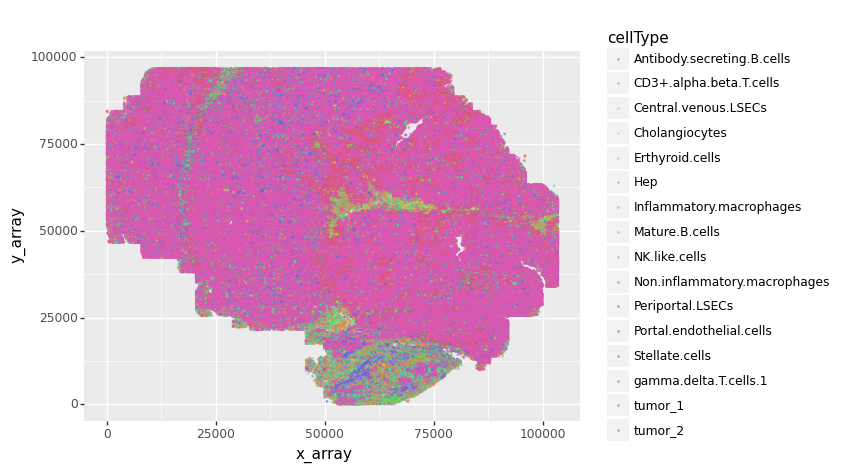

<ggplot: (1424902243690)>

In [37]:
(p9.ggplot(cancerousLiver.obs, p9.aes("x_array", "y_array", color="cellType")) + p9.geom_point(size=0.1, alpha=0.5))

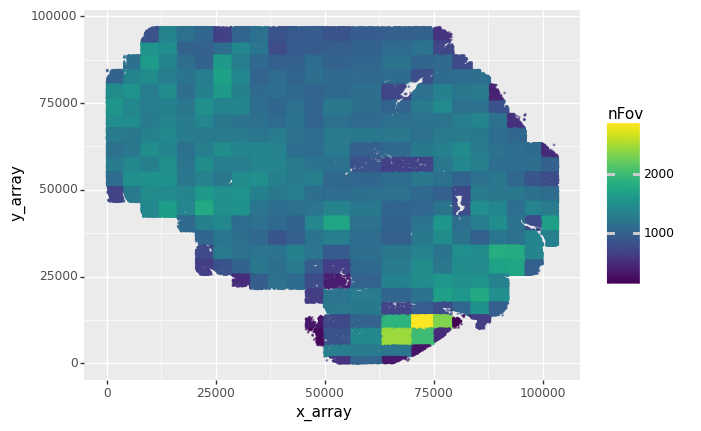

<ggplot: (1424904430674)>

In [38]:
nFov = dict(cancerousLiver.obs.fov.value_counts())
cancerousLiver.obs["nFov"] = cancerousLiver.obs.fov.apply(lambda x: nFov[x])
(p9.ggplot(cancerousLiver.obs, p9.aes("x_array", "y_array", color="nFov")) + p9.geom_point(size=0.1, alpha=0.5))

In [39]:
split_adata = []
for fov in cancerousLiver.obs.fov.unique():
    if nFov[fov] > 1000:
        mini_adata = cancerousLiver[(cancerousLiver.obs.fov == fov).astype(bool),: ].copy()
        mini_adata.obs["x_array"] = mini_adata.obs.x_slide_mm.rank(method="dense").astype(int)
        mini_adata.obs["y_array"] = mini_adata.obs.y_slide_mm.rank(method="dense").astype(int)

        mini_adata.obs["x_pixel"] = mini_adata.obs["x_FOV_px"].astype(np.float32)
        mini_adata.obs["y_pixel"]= mini_adata.obs["y_FOV_px"].astype(np.float32)

        maxX = mini_adata.obs["x_pixel"].max() - pad_limit
        maxY = mini_adata.obs["y_pixel"].max() - pad_limit

        idx_bool = np.logical_and(np.logical_and(mini_adata.obs["x_pixel"] >= pad_limit, mini_adata.obs["x_pixel"] <= maxX),
                                 np.logical_and(mini_adata.obs["y_pixel"] >= pad_limit, mini_adata.obs["y_pixel"] <= maxY))
        mini_adata = mini_adata[idx_bool,:]

        clusters = mini_adata.obs.cellType.value_counts()[mini_adata.obs.cellType.value_counts() / len(mini_adata) >= 0.01].index.values
        mini_adata = mini_adata[mini_adata.obs.cellType.isin(clusters),:] # remove rare clusters 1% (noise)
        nCluster = mini_adata.obs.cellType.unique().size

        fov_str = str(fov)
        if len(fov_str) == 1:
            fov_str = f"00{fov_str}"
        elif len(fov_str) == 2:
            fov_str = f"0{fov_str}"
        if len(mini_adata) > 0 and nCluster >= 3:
            split_adata.append(mini_adata)
            mini_adata.write_h5ad(f"cosMx_human_liver_cancer/data/{fov}.h5ad")

            img_path = f"cosMx_human_liver/data/cosMx_human_liver/LiverCancerFiles/CellStatsDir/CellComposite/CellComposite_F{fov_str}.jpg"
            img_out_path = f"cosMx_human_liver_cancer/data/{fov}.jpg"
            shutil.copy(img_path, img_out_path)
            print(f"FOV: {fov_str}; N_cells:{len(mini_adata)}; Removed cells: {(~idx_bool).sum()}")
            
        else:
            print(f"Empty for: {fov_str} with nCluster: {nCluster}")
            
    else:
        print(f"LQ {fov}")
    

/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 100; N_cells:1046; Removed cells: 88


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 101; N_cells:933; Removed cells: 93


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 102; N_cells:1137; Removed cells: 110


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 103; N_cells:1302; Removed cells: 107


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 104; N_cells:1085; Removed cells: 76


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 105; N_cells:1085; Removed cells: 69
LQ 106


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 107; N_cells:1339; Removed cells: 105


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 108; N_cells:1342; Removed cells: 106


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 109; N_cells:1162; Removed cells: 97
LQ 10


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 110; N_cells:1249; Removed cells: 103


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 111; N_cells:1158; Removed cells: 100


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 112; N_cells:1260; Removed cells: 113


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 113; N_cells:1100; Removed cells: 104


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 114; N_cells:1087; Removed cells: 80


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 115; N_cells:1049; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 116; N_cells:993; Removed cells: 91


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 117; N_cells:1090; Removed cells: 96


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 118; N_cells:927; Removed cells: 95


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 119; N_cells:1046; Removed cells: 82
LQ 11


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 120; N_cells:1011; Removed cells: 68


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 121; N_cells:1043; Removed cells: 83


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 122; N_cells:1099; Removed cells: 83


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 123; N_cells:1084; Removed cells: 87


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 125; N_cells:1278; Removed cells: 78


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 126; N_cells:1051; Removed cells: 94
LQ 127


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 128; N_cells:1152; Removed cells: 101


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 129; N_cells:1157; Removed cells: 68
LQ 12


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 130; N_cells:1214; Removed cells: 89


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 131; N_cells:1265; Removed cells: 127


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 132; N_cells:1159; Removed cells: 89


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 133; N_cells:1132; Removed cells: 105


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 134; N_cells:1159; Removed cells: 107


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 135; N_cells:1181; Removed cells: 99


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 136; N_cells:1107; Removed cells: 99


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 137; N_cells:1160; Removed cells: 104


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 138; N_cells:1060; Removed cells: 85


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 139; N_cells:1002; Removed cells: 96
LQ 13


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 140; N_cells:1144; Removed cells: 96


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 141; N_cells:1144; Removed cells: 87


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 142; N_cells:1111; Removed cells: 96


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 143; N_cells:1066; Removed cells: 79


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 144; N_cells:1152; Removed cells: 83


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 145; N_cells:1145; Removed cells: 96


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 146; N_cells:1141; Removed cells: 93


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 147; N_cells:992; Removed cells: 96


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 148; N_cells:969; Removed cells: 70


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 149; N_cells:1086; Removed cells: 84


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 014; N_cells:910; Removed cells: 80


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 150; N_cells:1125; Removed cells: 91


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 151; N_cells:1312; Removed cells: 124


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 152; N_cells:1248; Removed cells: 101


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 153; N_cells:1074; Removed cells: 89


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 154; N_cells:1160; Removed cells: 117


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 155; N_cells:1309; Removed cells: 119


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 156; N_cells:1265; Removed cells: 108


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 157; N_cells:1284; Removed cells: 93


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 158; N_cells:1237; Removed cells: 95


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 159; N_cells:1026; Removed cells: 81
LQ 15


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 160; N_cells:1031; Removed cells: 83


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 161; N_cells:1124; Removed cells: 109
LQ 162


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 164; N_cells:1159; Removed cells: 86


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 165; N_cells:1193; Removed cells: 110


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 166; N_cells:1298; Removed cells: 100


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 167; N_cells:1162; Removed cells: 88


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 168; N_cells:1070; Removed cells: 80


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 169; N_cells:1020; Removed cells: 84


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 016; N_cells:1409; Removed cells: 101


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 170; N_cells:990; Removed cells: 84


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 172; N_cells:1172; Removed cells: 88


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 173; N_cells:1281; Removed cells: 90


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 175; N_cells:1354; Removed cells: 112


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 176; N_cells:1093; Removed cells: 108


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 177; N_cells:1329; Removed cells: 110


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 178; N_cells:1178; Removed cells: 109


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 017; N_cells:1343; Removed cells: 108


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 180; N_cells:1234; Removed cells: 98


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 181; N_cells:1260; Removed cells: 92


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 182; N_cells:1169; Removed cells: 94


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 183; N_cells:1089; Removed cells: 91


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 184; N_cells:1076; Removed cells: 86
LQ 185
LQ 187


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 189; N_cells:1292; Removed cells: 92


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 018; N_cells:950; Removed cells: 64


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 190; N_cells:1203; Removed cells: 95


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 191; N_cells:1043; Removed cells: 72


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 192; N_cells:1002; Removed cells: 102


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 193; N_cells:1050; Removed cells: 80


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 194; N_cells:935; Removed cells: 64


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 195; N_cells:1004; Removed cells: 80


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 196; N_cells:1375; Removed cells: 85


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 197; N_cells:1381; Removed cells: 119


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 198; N_cells:1377; Removed cells: 100


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 199; N_cells:1121; Removed cells: 88


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 019; N_cells:907; Removed cells: 89


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 200; N_cells:1213; Removed cells: 116
FOV: 202; N_cells:1308; Removed cells: 102


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 203; N_cells:1365; Removed cells: 111


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 204; N_cells:1193; Removed cells: 106


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 205; N_cells:1144; Removed cells: 103


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 206; N_cells:1185; Removed cells: 103


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 207; N_cells:959; Removed cells: 78


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 208; N_cells:967; Removed cells: 72


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 209; N_cells:1027; Removed cells: 73


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 020; N_cells:1032; Removed cells: 79


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 210; N_cells:1111; Removed cells: 99


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 211; N_cells:1080; Removed cells: 72


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 212; N_cells:942; Removed cells: 69


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 213; N_cells:1085; Removed cells: 74


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 214; N_cells:1115; Removed cells: 94


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 215; N_cells:952; Removed cells: 102
LQ 216
LQ 218


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 219; N_cells:1153; Removed cells: 70


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 220; N_cells:1318; Removed cells: 123


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 221; N_cells:1323; Removed cells: 107


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 222; N_cells:1274; Removed cells: 102


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 223; N_cells:1458; Removed cells: 110


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 224; N_cells:1338; Removed cells: 131


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 225; N_cells:1376; Removed cells: 123


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 226; N_cells:1220; Removed cells: 99


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 227; N_cells:1109; Removed cells: 115
FOV: 228; N_cells:1181; Removed cells: 104


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 229; N_cells:1028; Removed cells: 104


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 022; N_cells:1136; Removed cells: 80


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 230; N_cells:990; Removed cells: 98


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 231; N_cells:1050; Removed cells: 79


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 232; N_cells:1078; Removed cells: 88


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 234; N_cells:905; Removed cells: 71
LQ 235


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 236; N_cells:1169; Removed cells: 96


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 237; N_cells:1144; Removed cells: 76


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 238; N_cells:1140; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 239; N_cells:1067; Removed cells: 74
LQ 23


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 240; N_cells:997; Removed cells: 93


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 241; N_cells:1287; Removed cells: 72


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 242; N_cells:1502; Removed cells: 114


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 243; N_cells:1237; Removed cells: 121


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 244; N_cells:1603; Removed cells: 119


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 245; N_cells:1363; Removed cells: 120
Empty for: 246 with nCluster: 2


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 247; N_cells:1090; Removed cells: 92


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 248; N_cells:1022; Removed cells: 96


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 249; N_cells:1028; Removed cells: 97
LQ 24


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 250; N_cells:1093; Removed cells: 92


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 251; N_cells:1232; Removed cells: 97


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 252; N_cells:1131; Removed cells: 89


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 253; N_cells:940; Removed cells: 79


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 254; N_cells:957; Removed cells: 88
Empty for: 255 with nCluster: 2
LQ 256


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 257; N_cells:1344; Removed cells: 119


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 258; N_cells:1260; Removed cells: 104


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 259; N_cells:1034; Removed cells: 89
LQ 25


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 260; N_cells:1249; Removed cells: 107


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 261; N_cells:1166; Removed cells: 88


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 262; N_cells:996; Removed cells: 76


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 263; N_cells:1193; Removed cells: 107


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 264; N_cells:1281; Removed cells: 106


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 265; N_cells:999; Removed cells: 83


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 266; N_cells:1068; Removed cells: 79


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 267; N_cells:1001; Removed cells: 65


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 268; N_cells:932; Removed cells: 68


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 269; N_cells:1283; Removed cells: 94
LQ 26


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 270; N_cells:1578; Removed cells: 98


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 271; N_cells:1085; Removed cells: 79


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 272; N_cells:913; Removed cells: 80


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 273; N_cells:1078; Removed cells: 98


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 274; N_cells:1419; Removed cells: 112


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 275; N_cells:1019; Removed cells: 105


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 276; N_cells:1150; Removed cells: 108


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 277; N_cells:1334; Removed cells: 110


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 278; N_cells:1092; Removed cells: 83
LQ 279


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 027; N_cells:921; Removed cells: 74


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 280; N_cells:1524; Removed cells: 89


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 281; N_cells:974; Removed cells: 70


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 282; N_cells:1130; Removed cells: 80


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 283; N_cells:1043; Removed cells: 91


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 284; N_cells:985; Removed cells: 79
LQ 285
LQ 286


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 287; N_cells:1098; Removed cells: 97


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 288; N_cells:1174; Removed cells: 98


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 289; N_cells:1000; Removed cells: 88


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 028; N_cells:988; Removed cells: 83
LQ 290


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 291; N_cells:1136; Removed cells: 90


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 292; N_cells:1304; Removed cells: 112


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 294; N_cells:915; Removed cells: 71


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 295; N_cells:1119; Removed cells: 86


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 296; N_cells:1046; Removed cells: 116


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 297; N_cells:1254; Removed cells: 90


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 298; N_cells:1232; Removed cells: 66


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 029; N_cells:1088; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 300; N_cells:1152; Removed cells: 77


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 301; N_cells:1058; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 302; N_cells:1097; Removed cells: 88


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 303; N_cells:1076; Removed cells: 99


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 304; N_cells:1215; Removed cells: 86


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 305; N_cells:1113; Removed cells: 78
LQ 306


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 307; N_cells:1034; Removed cells: 83


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 308; N_cells:1101; Removed cells: 107


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 309; N_cells:1238; Removed cells: 81
LQ 30


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 310; N_cells:1086; Removed cells: 93


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 311; N_cells:1359; Removed cells: 105


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 312; N_cells:1325; Removed cells: 102


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 313; N_cells:1638; Removed cells: 133


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 314; N_cells:1622; Removed cells: 140


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 315; N_cells:1269; Removed cells: 94
LQ 317


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 318; N_cells:919; Removed cells: 80


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 319; N_cells:1140; Removed cells: 84


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 031; N_cells:1068; Removed cells: 74


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 321; N_cells:1165; Removed cells: 89
LQ 323


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 324; N_cells:1001; Removed cells: 65


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 325; N_cells:1165; Removed cells: 80


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 326; N_cells:1341; Removed cells: 97


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 327; N_cells:1122; Removed cells: 82


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 328; N_cells:1326; Removed cells: 110


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 329; N_cells:1302; Removed cells: 116


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 032; N_cells:1476; Removed cells: 120


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 330; N_cells:1542; Removed cells: 128


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 331; N_cells:1589; Removed cells: 119


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 335; N_cells:1068; Removed cells: 74


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 336; N_cells:1041; Removed cells: 57
LQ 337
LQ 338


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 339; N_cells:943; Removed cells: 64


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 033; N_cells:1236; Removed cells: 103


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 340; N_cells:1230; Removed cells: 88


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 341; N_cells:1315; Removed cells: 118


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 343; N_cells:1343; Removed cells: 118


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 344; N_cells:1400; Removed cells: 112


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 345; N_cells:1246; Removed cells: 104


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 347; N_cells:1107; Removed cells: 85


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 349; N_cells:973; Removed cells: 62


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 034; N_cells:1040; Removed cells: 85


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 350; N_cells:1108; Removed cells: 74


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 351; N_cells:1536; Removed cells: 108


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 352; N_cells:1439; Removed cells: 132


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 353; N_cells:1635; Removed cells: 129


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 354; N_cells:1363; Removed cells: 107


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 355; N_cells:1153; Removed cells: 83


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 356; N_cells:1145; Removed cells: 85
LQ 357
LQ 358
LQ 359


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 035; N_cells:920; Removed cells: 92


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 360; N_cells:979; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 361; N_cells:1373; Removed cells: 114


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 365; N_cells:921; Removed cells: 84


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 366; N_cells:1737; Removed cells: 125


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 367; N_cells:2623; Removed cells: 138


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 368; N_cells:2130; Removed cells: 123


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 036; N_cells:1453; Removed cells: 130
LQ 370


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 373; N_cells:1280; Removed cells: 108


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 374; N_cells:2248; Removed cells: 137


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 375; N_cells:1848; Removed cells: 124
LQ 376


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 378; N_cells:1159; Removed cells: 106


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 379; N_cells:1106; Removed cells: 85


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 037; N_cells:1186; Removed cells: 102
LQ 383


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 038; N_cells:1006; Removed cells: 79


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 039; N_cells:907; Removed cells: 80


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 003; N_cells:1079; Removed cells: 84
LQ 40


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 041; N_cells:1028; Removed cells: 74


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 042; N_cells:928; Removed cells: 84


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 043; N_cells:959; Removed cells: 75


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 044; N_cells:1087; Removed cells: 91


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 045; N_cells:952; Removed cells: 55


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 046; N_cells:1008; Removed cells: 72
LQ 47


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 048; N_cells:936; Removed cells: 73


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 049; N_cells:1235; Removed cells: 97
FOV: 004; N_cells:956; Removed cells: 80


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 050; N_cells:1285; Removed cells: 125


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 051; N_cells:1187; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 052; N_cells:1108; Removed cells: 81
FOV: 053; N_cells:1178; Removed cells: 96


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 054; N_cells:1518; Removed cells: 121


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 055; N_cells:1271; Removed cells: 106


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 056; N_cells:928; Removed cells: 80


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 057; N_cells:1035; Removed cells: 71


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 058; N_cells:935; Removed cells: 91


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 059; N_cells:1043; Removed cells: 78


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 060; N_cells:992; Removed cells: 82


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 061; N_cells:969; Removed cells: 96


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 062; N_cells:1016; Removed cells: 83
FOV: 064; N_cells:990; Removed cells: 85


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 065; N_cells:1005; Removed cells: 93


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 066; N_cells:1056; Removed cells: 56


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 067; N_cells:1295; Removed cells: 137


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 068; N_cells:1419; Removed cells: 106


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 069; N_cells:1168; Removed cells: 104


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 006; N_cells:942; Removed cells: 88


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 070; N_cells:1336; Removed cells: 97


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 071; N_cells:1046; Removed cells: 87


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 072; N_cells:1170; Removed cells: 111


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 073; N_cells:1470; Removed cells: 107


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 074; N_cells:1218; Removed cells: 95


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 075; N_cells:995; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 076; N_cells:1033; Removed cells: 83


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 077; N_cells:979; Removed cells: 78


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 078; N_cells:932; Removed cells: 82


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 079; N_cells:995; Removed cells: 78


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 007; N_cells:1095; Removed cells: 77


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 080; N_cells:1049; Removed cells: 75
LQ 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 082; N_cells:1052; Removed cells: 90


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 083; N_cells:1210; Removed cells: 102


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 084; N_cells:1110; Removed cells: 84


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 085; N_cells:1137; Removed cells: 109


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 087; N_cells:1416; Removed cells: 114


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 088; N_cells:1271; Removed cells: 117


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 089; N_cells:1199; Removed cells: 76
LQ 8


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 090; N_cells:1209; Removed cells: 105


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 091; N_cells:1101; Removed cells: 106


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 092; N_cells:1350; Removed cells: 109


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 093; N_cells:1240; Removed cells: 107


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 094; N_cells:1277; Removed cells: 95


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 095; N_cells:1020; Removed cells: 85


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 096; N_cells:974; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 097; N_cells:1062; Removed cells: 82


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 098; N_cells:945; Removed cells: 81


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 099; N_cells:1161; Removed cells: 68
LQ 9


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 124; N_cells:1184; Removed cells: 91


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 163; N_cells:999; Removed cells: 65
LQ 171


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 174; N_cells:1197; Removed cells: 95


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 179; N_cells:1167; Removed cells: 96
LQ 186
LQ 1


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 201; N_cells:1120; Removed cells: 89
LQ 217


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 021; N_cells:1295; Removed cells: 101


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 233; N_cells:991; Removed cells: 70


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 293; N_cells:1081; Removed cells: 99


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 002; N_cells:1243; Removed cells: 89
LQ 316


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 320; N_cells:1029; Removed cells: 99
LQ 332
LQ 334


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 342; N_cells:1438; Removed cells: 126


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 348; N_cells:1179; Removed cells: 87
LQ 362
LQ 363
LQ 369
LQ 372


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 377; N_cells:1213; Removed cells: 63


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 382; N_cells:968; Removed cells: 56
LQ 63
LQ 86


/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


FOV: 188; N_cells:1120; Removed cells: 106
LQ 299
LQ 322
LQ 333
LQ 346
LQ 364
LQ 371
LQ 380
LQ 381
LQ 5


### Sample cancer FOVs

In [40]:
def get_fov_neghbours(andata):
    from tqdm import tqdm
    tab = andata.obs
    neighbour_fov = {}
    for fov in tqdm(tab.fov.unique()):

        tab_fov = tab.query(f"fov == {fov}")

        xMin = tab_fov.x_array.min()
        xMax = tab_fov.x_array.max()

        yMin = tab_fov.y_array.min()
        yMax = tab_fov.y_array.max()

        width_idx = np.logical_and(tab.x_array > xMin - 2000, tab.x_array < xMax + 2000)
        heigh_idx = np.logical_and(tab.y_array > yMin - 2000, tab.y_array < yMax + 2000)

        neighbour_fov[fov] = list(set(tab[np.logical_and(width_idx, heigh_idx)].fov.unique()))
    return neighbour_fov

In [41]:
neighbour_fov_cancer = get_fov_neghbours(cancerousLiver)

100%|██████████| 383/383 [00:10<00:00, 36.68it/s]


In [42]:
nComb = 100

In [43]:
files = glob.glob("cosMx_human_liver_cancer/data/*.jpg")
files = [f.split("/")[-1].split(".")[0] for f in files]
np.random.shuffle(files)
files = files[:nComb]
files[:2]

['221', '223']

In [44]:
fov = [int(f) for f in files]

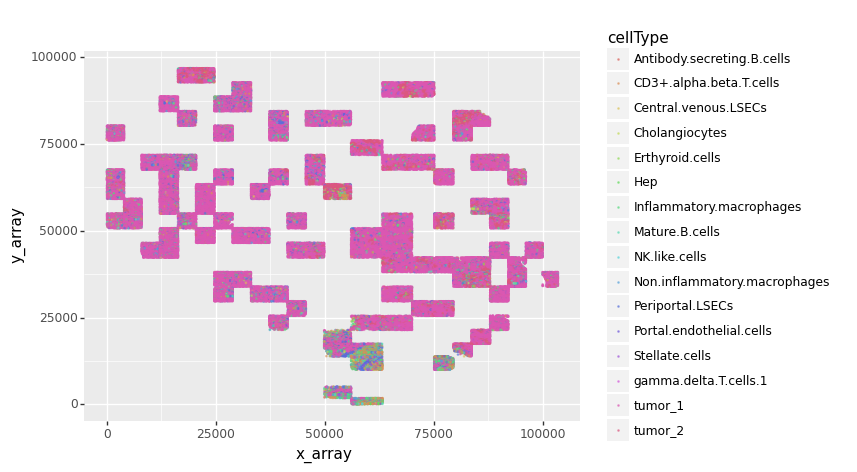

<ggplot: (1424737281844)>

In [45]:
(p9.ggplot(cancerousLiver.obs[cancerousLiver.obs.fov.astype(int).isin(fov)], p9.aes("x_array", "y_array", color="cellType")) + p9.geom_point(size=0.1, alpha=0.5))

In [47]:
for f in files:
    print(f"- '{f}'")

- '221'
- '223'
- '21'
- '300'
- '110'
- '128'
- '308'
- '327'
- '59'
- '177'
- '274'
- '303'
- '231'
- '125'
- '36'
- '355'
- '214'
- '232'
- '201'
- '272'
- '296'
- '28'
- '225'
- '293'
- '365'
- '161'
- '242'
- '65'
- '76'
- '360'
- '131'
- '33'
- '253'
- '111'
- '347'
- '205'
- '173'
- '4'
- '196'
- '211'
- '340'
- '175'
- '121'
- '139'
- '152'
- '283'
- '66'
- '313'
- '60'
- '273'
- '278'
- '282'
- '294'
- '250'
- '326'
- '249'
- '209'
- '258'
- '144'
- '321'
- '298'
- '122'
- '345'
- '226'
- '57'
- '368'
- '276'
- '118'
- '356'
- '335'
- '100'
- '67'
- '137'
- '149'
- '29'
- '275'
- '339'
- '382'
- '157'
- '126'
- '134'
- '148'
- '377'
- '82'
- '190'
- '353'
- '73'
- '252'
- '109'
- '191'
- '302'
- '3'
- '199'
- '260'
- '154'
- '52'
- '37'
- '195'
- '84'
- '241'


In [48]:
def select_test_fov(fov, neighbour_fov_list, all_fov, size=20):
    import numpy as np
    
    test_fovs = list(set(all_fov) - set(neighbour_fov_list))
    return np.random.choice(test_fovs, size=size, replace=False).tolist()

In [49]:
for f in fov:
    test_fov = select_test_fov(f, neighbour_fov_cancer[f], files)
    print(f"- [['{f}'], {test_fov}]")

- [['221'], ['111', '293', '249', '272', '161', '368', '21', '65', '253', '282', '275', '356', '137', '196', '154', '345', '252', '303', '296', '300']]
- [['223'], ['253', '66', '59', '4', '252', '300', '177', '302', '293', '173', '223', '76', '313', '250', '110', '339', '195', '272', '356', '122']]
- [['21'], ['253', '84', '154', '296', '249', '190', '201', '303', '209', '67', '122', '196', '134', '205', '335', '308', '128', '65', '282', '382']]
- [['300'], ['253', '345', '149', '111', '355', '152', '225', '226', '4', '300', '76', '137', '326', '242', '157', '353', '368', '144', '278', '60']]
- [['110'], ['339', '29', '293', '110', '33', '131', '67', '205', '109', '274', '211', '223', '195', '199', '275', '121', '201', '308', '300', '340']]
- [['128'], ['214', '382', '313', '368', '144', '365', '302', '260', '131', '205', '65', '377', '201', '3', '29', '339', '126', '253', '173', '36']]
- [['308'], ['272', '100', '161', '298', '76', '4', '29', '201', '278', '355', '232', '110', '214',

## Sample normal

In [50]:
neighbour_fov_normal = get_fov_neghbours(normalLiver)

100%|██████████| 301/301 [00:06<00:00, 45.08it/s]


In [51]:
files = glob.glob("cosMx_human_liver_normal/data/*.jpg")
files = [f.split("/")[-1].split(".")[0] for f in files]
np.random.shuffle(files)
files = files[:nComb]
files[:2]

['38', '290']

In [52]:
fov = [int(f) for f in files]

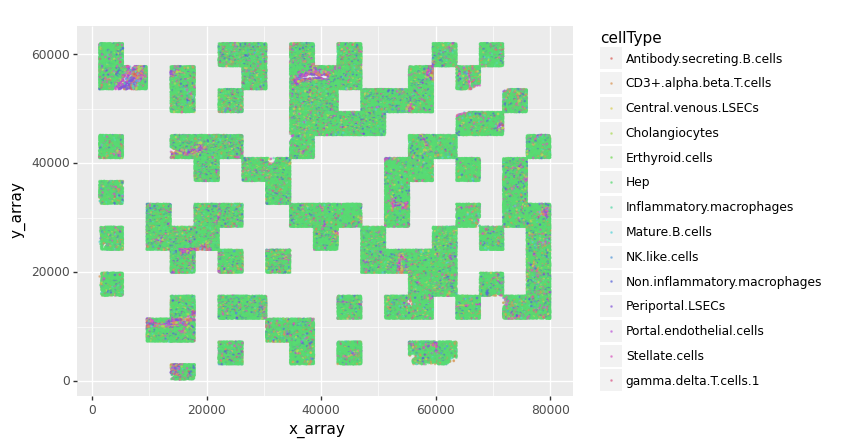

<ggplot: (1424609675325)>

In [53]:
(p9.ggplot(normalLiver.obs[normalLiver.obs.fov.astype(int).isin(fov)], p9.aes("x_array", "y_array", color="cellType")) + p9.geom_point(size=0.1, alpha=0.5))

In [54]:
for f in files:
    print(f"- '{f}'")

- '38'
- '290'
- '91'
- '278'
- '32'
- '114'
- '253'
- '252'
- '94'
- '202'
- '81'
- '23'
- '124'
- '240'
- '140'
- '145'
- '235'
- '122'
- '76'
- '16'
- '119'
- '258'
- '89'
- '223'
- '73'
- '195'
- '161'
- '7'
- '153'
- '226'
- '181'
- '55'
- '157'
- '188'
- '236'
- '53'
- '167'
- '193'
- '197'
- '52'
- '12'
- '120'
- '179'
- '75'
- '243'
- '61'
- '204'
- '248'
- '275'
- '203'
- '99'
- '31'
- '280'
- '36'
- '2'
- '228'
- '174'
- '86'
- '56'
- '74'
- '245'
- '233'
- '47'
- '247'
- '210'
- '111'
- '284'
- '257'
- '170'
- '24'
- '33'
- '57'
- '186'
- '8'
- '49'
- '184'
- '208'
- '128'
- '283'
- '151'
- '242'
- '90'
- '80'
- '26'
- '29'
- '201'
- '224'
- '135'
- '113'
- '18'
- '172'
- '173'
- '100'
- '154'
- '10'
- '159'
- '166'
- '104'
- '158'
- '164'


In [55]:
for f in fov:
    test_fov = select_test_fov(f, neighbour_fov_normal[f], files)
    print(f"- [['{f}'], {test_fov}]")

- [['38'], ['7', '242', '31', '124', '153', '233', '33', '164', '145', '275', '57', '10', '80', '91', '89', '247', '135', '173', '210', '161']]
- [['290'], ['224', '197', '49', '248', '113', '170', '31', '158', '235', '74', '2', '167', '283', '57', '186', '247', '233', '202', '36', '290']]
- [['91'], ['91', '18', '258', '179', '226', '80', '243', '284', '38', '76', '36', '100', '12', '204', '278', '73', '111', '166', '253', '7']]
- [['278'], ['49', '167', '210', '99', '280', '32', '170', '151', '186', '47', '159', '247', '114', '184', '140', '233', '16', '252', '111', '257']]
- [['32'], ['235', '104', '100', '55', '145', '57', '181', '157', '140', '164', '224', '53', '159', '153', '91', '74', '10', '247', '124', '170']]
- [['114'], ['202', '81', '278', '80', '53', '104', '226', '161', '24', '29', '56', '243', '166', '235', '253', '248', '201', '242', '111', '7']]
- [['253'], ['201', '73', '99', '157', '135', '120', '53', '61', '275', '29', '153', '284', '202', '228', '154', '151', '174

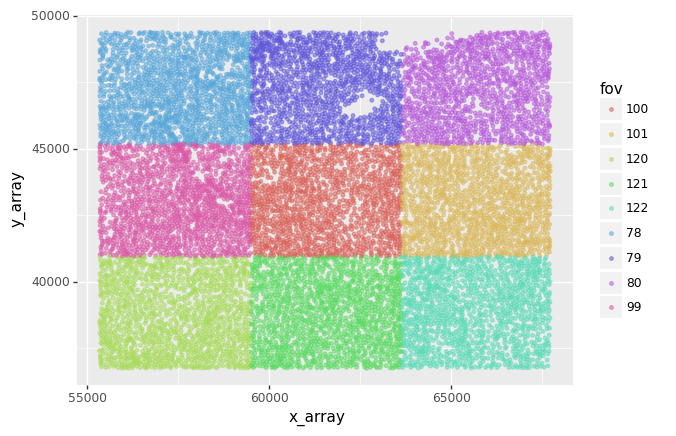

<ggplot: (1424943190315)>

In [56]:
tab = normalLiver.obs
tab.fov = tab.fov.astype(str)
(p9.ggplot(tab[tab.fov.astype(int).isin(neighbour_fov_normal[100])], p9.aes("x_array", "y_array", color="fov")) + p9.geom_point(size=1, alpha=0.5))

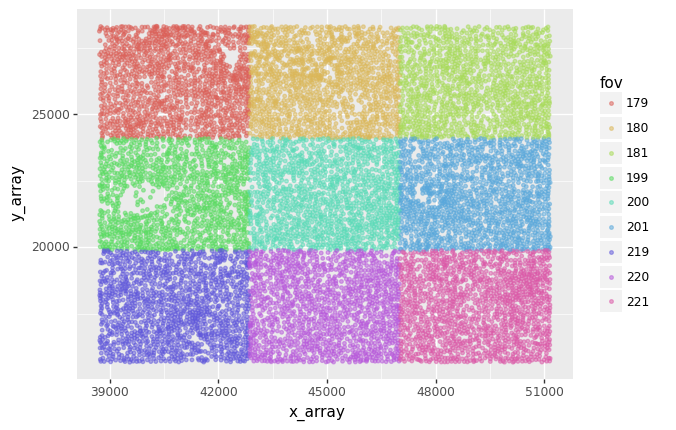

<ggplot: (1424598131194)>

In [57]:
tab = normalLiver.obs
tab.fov = tab.fov.astype(str)
(p9.ggplot(tab[tab.fov.astype(int).isin(neighbour_fov_normal[200])], p9.aes("x_array", "y_array", color="fov")) + p9.geom_point(size=1, alpha=0.5))